In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# 1. Carga de datos

**Cargamos** la tabla completa de datos

In [2]:
# Se carga el dataset
hoteles = pd.read_csv("hoteles-entrena.csv")
hoteles.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_date
0,Resort_Hotel,342,0,0,2,none,BB,PRT,Direct,Direct,0,0,0,C,C,3,No_Deposit,NaN,NaN,0,Transient,0.0,none,0,2015-07-01
1,Resort_Hotel,737,0,0,2,none,BB,PRT,Direct,Direct,0,0,0,C,C,4,No_Deposit,NaN,NaN,0,Transient,0.0,none,0,2015-07-01
2,Resort_Hotel,7,0,1,1,none,BB,GBR,Direct,Direct,0,0,0,A,C,0,No_Deposit,NaN,NaN,0,Transient,75.0,none,0,2015-07-01
3,Resort_Hotel,13,0,1,1,none,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No_Deposit,304.0,NaN,0,Transient,75.0,none,0,2015-07-01
4,Resort_Hotel,14,0,2,2,none,BB,GBR,Online_TA,TA/TO,0,0,0,A,A,0,No_Deposit,240.0,NaN,0,Transient,98.0,none,1,2015-07-01


**Información** del conjunto de datos

In [3]:
hoteles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61969 entries, 0 to 61968
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61969 non-null  object 
 1   lead_time                       61969 non-null  int64  
 2   stays_in_weekend_nights         61969 non-null  int64  
 3   stays_in_week_nights            61969 non-null  int64  
 4   adults                          61969 non-null  int64  
 5   children                        61969 non-null  object 
 6   meal                            61969 non-null  object 
 7   country                         61548 non-null  object 
 8   market_segment                  61969 non-null  object 
 9   distribution_channel            61969 non-null  object 
 10  is_repeated_guest               61969 non-null  int64  
 11  previous_cancellations          61969 non-null  int64  
 12  previous_bookings_not_canceled  

**Buscamos** predecir para una reservación si se van a tener niños o no

In [4]:
#Categorías de salida
hoteles['children'].unique()

array(['none', 'children'], dtype=object)

In [5]:
#Balanceo de variable respuesta
hoteles['children'].value_counts(normalize=True)

none        0.925366
children    0.074634
Name: children, dtype: float64

**Observaciones**
* El $92.5\%$ de las reservaciones no tienen hijos.
* El $7.5\%$ de las reservaciones tienen hijos.
* La base está fuertemente desbalanceada para la variable respuesta.
* Posiblemente sea requerido un criterio de balanceo de bases.

# 2. Análisis Exploratorio e Ingeniería de Entradas

**Primero** empezamos con las variables que no sean numéricas

## 2.1 Variables no numéricas

In [6]:
cat_vars = hoteles.dtypes[hoteles.dtypes == 'object'].keys()
for var in cat_vars:
    print(f"{var}:")
    print(f"\tCats: {len(hoteles[var].unique())}")
    print(20*'-')

hotel:
	Cats: 2
--------------------
children:
	Cats: 2
--------------------
meal:
	Cats: 5
--------------------
country:
	Cats: 156
--------------------
market_segment:
	Cats: 7
--------------------
distribution_channel:
	Cats: 5
--------------------
reserved_room_type:
	Cats: 9
--------------------
assigned_room_type:
	Cats: 10
--------------------
deposit_type:
	Cats: 3
--------------------
customer_type:
	Cats: 4
--------------------
required_car_parking_spaces:
	Cats: 2
--------------------
arrival_date:
	Cats: 670
--------------------


**Descartamos** las variables `country` y `arrival_date` de la lista de variables categóricas para efectos de visualización

In [7]:
cat_panel = cat_vars.to_list()
cat_panel.remove('country')
cat_panel.remove('arrival_date')

for var in cat_panel:
    print(f"{var}:")
    print(f"\tCats: {hoteles[var].unique()}")
    print(20*'-')

hotel:
	Cats: ['Resort_Hotel' 'City_Hotel']
--------------------
children:
	Cats: ['none' 'children']
--------------------
meal:
	Cats: ['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------
market_segment:
	Cats: ['Direct' 'Corporate' 'Online_TA' 'Offline_TA/TO' 'Complementary' 'Groups'
 'Aviation']
--------------------
distribution_channel:
	Cats: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
--------------------
reserved_room_type:
	Cats: ['C' 'A' 'D' 'G' 'E' 'F' 'H' 'L' 'B']
--------------------
assigned_room_type:
	Cats: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'K']
--------------------
deposit_type:
	Cats: ['No_Deposit' 'Refundable' 'Non_Refund']
--------------------
customer_type:
	Cats: ['Transient' 'Contract' 'Transient-Party' 'Group']
--------------------
required_car_parking_spaces:
	Cats: ['none' 'parking']
--------------------


**Graficamos** variables categóricas

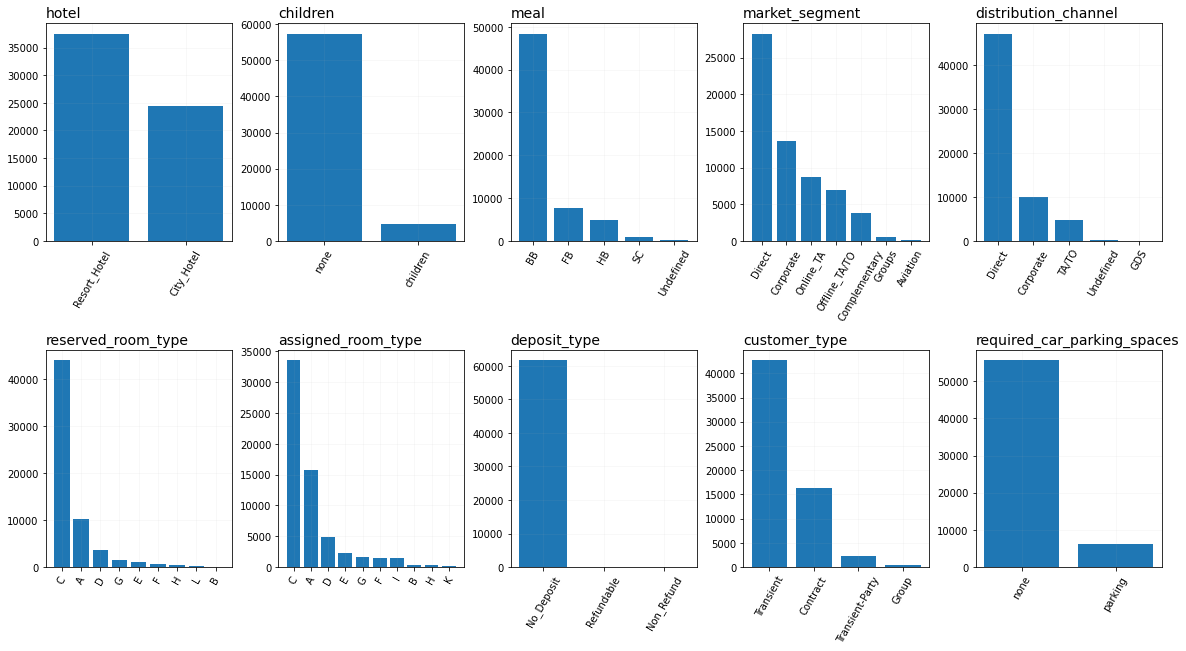

In [8]:
fig = plt.figure(figsize=(20,10))
spec = plt.GridSpec(ncols=5, nrows=2, wspace=0.25, hspace=0.5)

#Páneles
for i in range(len(cat_panel)):
    #Especificaciones de figura
    ax = fig.add_subplot(spec[i])
    
    #Contenido de figura
    ax.bar(x=hoteles[cat_panel[i]].unique(), height=hoteles[cat_panel[i]].value_counts())
    
    #Anotaciones y estilo
    ax.set_title(f"{cat_panel[i]}", fontsize=14, loc='left')
    ax.tick_params(axis='x', labelrotation=60)
    ax.grid(alpha=0.1)
    # ax.legend()

plt.show()

**Observamos** que la variable `deposit_type` está fuertemente desbalanceada, la exploramos rápidamente para determinar la proporción de `children` contenida en aquellas reservaciones diferentes a _No_Deposit_ dentro de `deposit_type`

In [9]:
print("Cuenta de children en deposite_type dado que no hubo depósito:")
print(hoteles.loc[hoteles['deposit_type'] != 'No_Deposit']['children'].value_counts(),'\n')
print("Se descarta variable")

Cuenta de children en deposite_type dado que no hubo depósito:
none        214
children      4
Name: children, dtype: int64 

Se descarta variable


**Revisamos** las dos variables categóricas que descartamos del primer análisis, empezando por `country`.

En la información de la base, nos percatamos que `country` es una variable incompleta, entonces:
>**Paso 1**: Reemplazamos valores nulor por _Undefined_.

In [10]:
hoteles['country'].fillna(value='Undefined', inplace=True)

#Recuento de nulos después de sustituir
print(f"Valores NaN en country: {hoteles['country'].isna().sum()}")

Valores NaN en country: 0


>**Paso 2**: Observamos la distribución de reservaciones hechas por país.

In [11]:
#Función para obtener el ordenamiento de los cuantiles
def cuantiles_df(df, column):
    ordenamiento = pd.DataFrame(df.sort_values(by=column)[column])
    ordenamiento.reset_index(drop=True, inplace=True)
    ordenamiento['orden'] = pd.Series(np.arange(1,ordenamiento.shape[0]+1))
    ordenamiento['f'] = (ordenamiento['orden'] - 0.5)/len(ordenamiento)    
    
    return ordenamiento

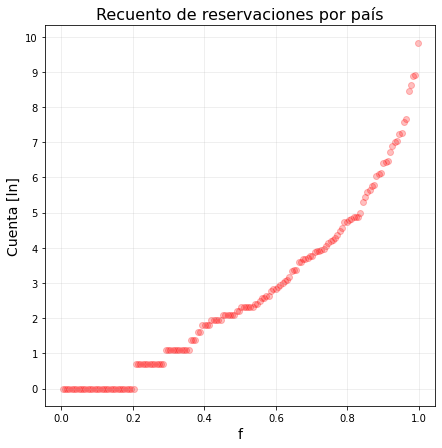

In [12]:
#Se obtiene el recuento de reservaciones por country
books_by_country = hoteles.groupby(by='country').count()[['hotel']]
bbc_cuantiles = cuantiles_df(books_by_country, 'hotel')

#Tamaño de la figura
plt.figure(figsize=(7,7))

#Graficando para X1
plt.scatter(x=bbc_cuantiles['f'], y=np.log(bbc_cuantiles['hotel']), c='red', alpha=0.25)

#Styling
plt.title('Recuento de reservaciones por país', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('Cuenta [ln]', fontsize=14)
plt.yticks(ticks=np.arange(11))
plt.grid(alpha=0.25)

**Notamos** que al rededor del $80\%$ de los paises se encuentran por debajo de ${ln}({cuenta}) = 5$, es decir, por debajo de $148$ reservaciones. Análisamos un poco más al respecto.
>**Paso 3**: Filtramos aquellos países cuya cuenta de reservaciones esté por debajo de `148`, y observamos la proporción de `children` contenido en este subconjunto.

In [15]:
#Se obtienen los países por debajo de 148 reservaciones.
country_mask = books_by_country.loc[books_by_country['hotel'] <= 148].index.to_list()

>**Paso 4**: Obtenemos la proporción de `children` contenidos en los países que filtramos

In [16]:
print("Cuenta de children en paises con menos de 148 reservaciones:")
print(hoteles.loc[hoteles['country'].isin(country_mask)]['children'].value_counts(),'\n')
#print("Se descarta variable")

Cuenta de children en paises con menos de 148 reservaciones:
none        2527
children     256
Name: children, dtype: int64 



**Recordamos** la cuenta original de `children`

In [17]:
hoteles['children'].value_counts(normalize=False)

none        57344
children     4625
Name: children, dtype: int64

**Observaciones**:
* Vemos que de las $4,625$ reservaciones con niños, $256$ se hicieron por los paises que fueron filtrados, lo cual representa el $5.5\%$ de las reservaciones totales con niños.
* Como complemento, el $94.5\%$ de las reservaciones con niños están contenidas en el $20\%$ de los países. 

>**Paso 5**: Reemplazamos las etiquetas de paises cuya cuenta de reservaciones ${ln}({cuenta})\leq 5$ por `OTH`: Other, y observamos la nueva distribución de paises.

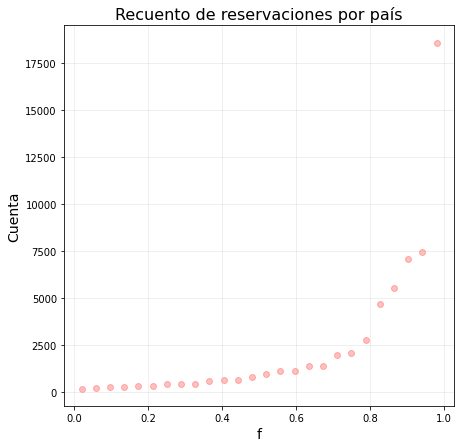

In [18]:
#Reemplazar etiquetas
hoteles.loc[hoteles['country'].isin(country_mask), 'country'] = 'OTH'

#Se obtiene el recuento de reservaciones por country
books_by_country = hoteles.groupby(by='country').count()[['hotel']]
bbc_cuantiles = cuantiles_df(books_by_country, 'hotel')

#Tamaño de la figura
plt.figure(figsize=(7,7))

#Graficando para X1
plt.scatter(x=bbc_cuantiles['f'], y=bbc_cuantiles['hotel'], c='red', alpha=0.25)

#Styling
plt.title('Recuento de reservaciones por país', fontsize=16)
plt.xlabel('f', fontsize=14)
plt.ylabel('Cuenta', fontsize=14)
plt.grid(alpha=0.25)

**Observaciones**:
* La distribución mejoró, pero continúa teniendo una cola extremadamente larga.

In [26]:
hoteles.loc[hoteles['days_in_waiting_list'] != 0]['children'].value_counts()

none        1314
children      10
Name: children, dtype: int64

## 2.2 Variables numéricas

In [18]:
num_vars = hoteles.dtypes[(hoteles.dtypes == 'float')|(hoteles.dtypes == 'int64')].keys()
for var in num_vars:
    print(f"{var}:")
    print(f"\tNa: {hoteles[var].isna().sum()}")
    print(20*'-')

lead_time:
	Na: 0
--------------------
stays_in_weekend_nights:
	Na: 0
--------------------
stays_in_week_nights:
	Na: 0
--------------------
adults:
	Na: 0
--------------------
is_repeated_guest:
	Na: 0
--------------------
previous_cancellations:
	Na: 0
--------------------
previous_bookings_not_canceled:
	Na: 0
--------------------
booking_changes:
	Na: 0
--------------------
agent:
	Na: 10940
--------------------
company:
	Na: 57006
--------------------
days_in_waiting_list:
	Na: 0
--------------------
average_daily_rate:
	Na: 0
--------------------
total_of_special_requests:
	Na: 0
--------------------


In [21]:
num_panel = num_vars.to_list()
num_panel.remove('company')

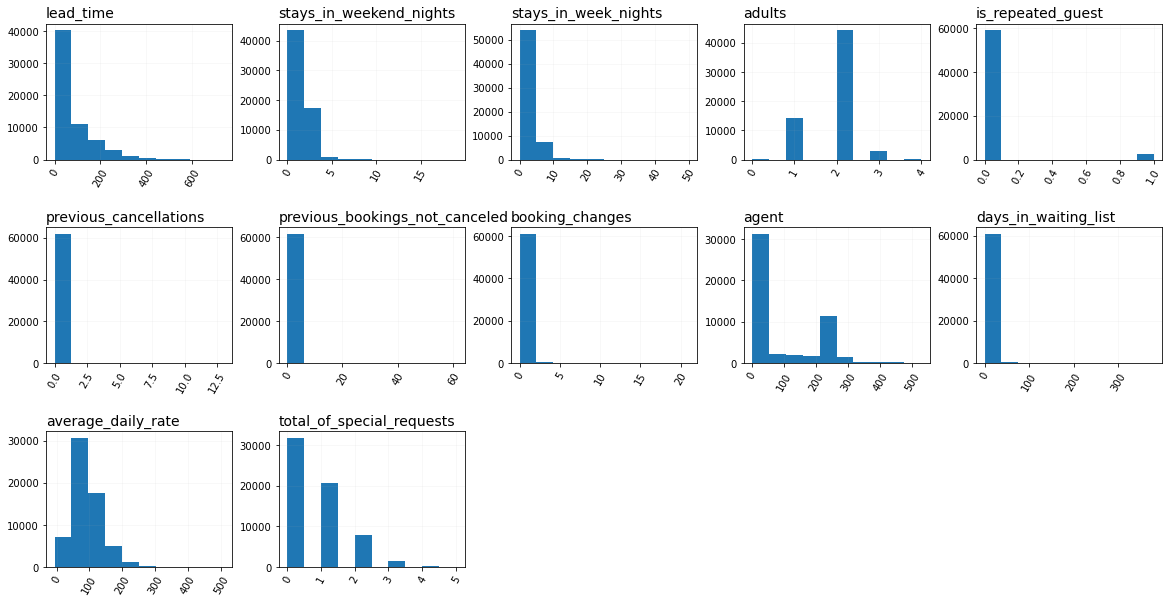

In [26]:
fig = plt.figure(figsize=(20,10))
spec = plt.GridSpec(ncols=5, nrows=3, wspace=0.25, hspace=0.5)

#Páneles
for i in range(len(num_panel)):
    #Especificaciones de figura
    ax = fig.add_subplot(spec[i])
    
    #Contenido de figura
    ax.hist(x=hoteles[num_panel[i]])
    
    #Anotaciones y estilo
    ax.set_title(f"{num_panel[i]}", fontsize=14, loc='left')
    ax.tick_params(axis='x', labelrotation=60)
    ax.grid(alpha=0.1)
    # ax.legend()

plt.show()

In [29]:
hoteles['agent'].value_counts()

9.0      14552
240.0     7045
7.0       2476
14.0      2166
1.0       1911
         ...  
54.0         1
479.0        1
476.0        1
337.0        1
453.0        1
Name: agent, Length: 297, dtype: int64

In [38]:
print(hoteles.loc[hoteles['agent'] != 9.0]['children'].value_counts(),'\n')
print(hoteles.loc[hoteles['agent'] == 9.0]['children'].value_counts(),'\n')
print(hoteles.loc[hoteles['agent'].isna()]['children'].value_counts(),'\n')

none        44273
children     3144
Name: children, dtype: int64 

none        13071
children     1481
Name: children, dtype: int64 

none        10347
children      593
Name: children, dtype: int64 



**Observacion** La mayoría de las observaciones corresponden al agente numero $9$. Hay una mayor proporción de 'children' cuando la variable agent es $9$, por lo que sustituir NA's con la moda, en este caso sesgaría la predicción. Se recomienda convertir la variable a categoría y sustituir Na's con un 'not_disclosed', o simplemente sustituir por un $0$.


In [ ]:
cols_to_drop = ['deposit_type', 'days_in_waiting_list']

# Limpieza

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61969 entries, 0 to 61968
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61969 non-null  object 
 1   lead_time                       61969 non-null  int64  
 2   stays_in_weekend_nights         61969 non-null  int64  
 3   stays_in_week_nights            61969 non-null  int64  
 4   adults                          61969 non-null  int64  
 5   children                        61969 non-null  object 
 6   meal                            61969 non-null  object 
 7   country                         61548 non-null  object 
 8   market_segment                  61969 non-null  object 
 9   distribution_channel            61969 non-null  object 
 10  is_repeated_guest               61969 non-null  int64  
 11  previous_cancellations          61969 non-null  int64  
 12  previous_bookings_not_canceled  

In [4]:
# Nos deshacemos de variables
df.drop(['arrival_date','deposit_type','agent','company','booking_changes','distribution_channel','country'],axis=1, inplace=True)

In [5]:
# Cambiamos de variables caegoricas a numericas
df["required_car_parking_spaces"] = df["required_car_parking_spaces"].astype('category').cat.codes
df["hotel"] = df["hotel"].astype('category').cat.codes
df["children"] = df["children"].astype('category').cat.codes

In [6]:
# Creamos one-hot encoding para las siguientes variables:
df = pd.concat([df, pd.get_dummies(df.meal)], axis=1)
df.drop(['meal'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.market_segment)], axis=1)
df.drop(['market_segment'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.reserved_room_type)], axis=1)
df.drop(['reserved_room_type'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.assigned_room_type)], axis=1)
df.drop(['assigned_room_type'], axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df.customer_type)], axis=1)
df.drop(['customer_type'], axis=1, inplace=True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61969 entries, 0 to 61968
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61969 non-null  int8   
 1   lead_time                       61969 non-null  int64  
 2   stays_in_weekend_nights         61969 non-null  int64  
 3   stays_in_week_nights            61969 non-null  int64  
 4   adults                          61969 non-null  int64  
 5   children                        61969 non-null  int8   
 6   is_repeated_guest               61969 non-null  int64  
 7   previous_cancellations          61969 non-null  int64  
 8   previous_bookings_not_canceled  61969 non-null  int64  
 9   days_in_waiting_list            61969 non-null  int64  
 10  average_daily_rate              61969 non-null  float64
 11  required_car_parking_spaces     61969 non-null  int8   
 12  total_of_special_requests       

In [89]:
# Distribuciones

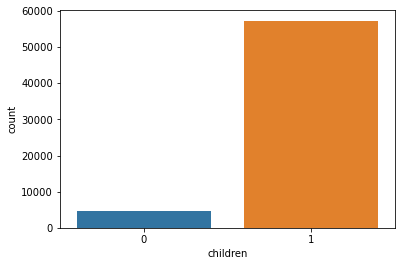

In [7]:
# First target variable alone
sns.countplot(x='children', data=df)
plt.show()

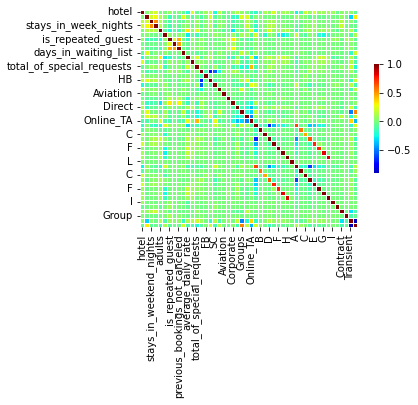

hotel                            -0.010671
lead_time                         0.027671
stays_in_weekend_nights          -0.025207
stays_in_week_nights             -0.019995
adults                           -0.076086
children                          1.000000
is_repeated_guest                 0.040029
previous_cancellations            0.015214
previous_bookings_not_canceled    0.029329
days_in_waiting_list              0.030404
average_daily_rate               -0.280108
required_car_parking_spaces      -0.083064
total_of_special_requests        -0.146437
BB                               -0.026854
FB                               -0.025268
HB                               -0.012394
SC                                0.055022
Undefined                         0.017067
Aviation                          0.012920
Complementary                    -0.000279
Corporate                         0.062813
Direct                           -0.080841
Groups                            0.092073
Offline_TA/

In [8]:
# Let's explore correlations between pairs of variables
corrmat = df.corr()

sns.heatmap(corrmat, center=0, cmap='jet', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

print(corrmat['children'])

# Separacion

In [9]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,test_size=0.2)
print(df_train.shape)
print(df_test.shape)

#x_train=df_train.drop('children',axis = 1)
#y_train = df_train[['children']]
#print(x_train.shape)
#print(y_train.shape)

#x_test=df_test.drop('children',axis = 1)
#y_test = df_test[['children']]
#print(x_test.shape)
#print(y_test.shape)

(49575, 48)
(12394, 48)


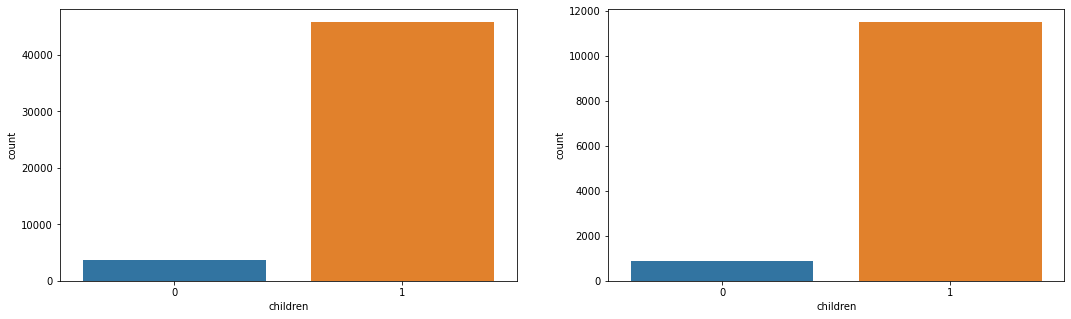

In [10]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='children', data=df_train)
plt.subplot(1, 2, 2)
sns.countplot(x='children', data=df_test)
plt.show()

# Entrenar

In [11]:
x_train=df_train.drop('children',axis = 1).to_numpy()
y_train = df_train[['children']].to_numpy()
print(x_train.shape)
print(y_train.shape)

x_test=df_test.drop('children',axis = 1).to_numpy()
y_test = df_test[['children']].to_numpy()
print(x_test.shape)
print(y_test.shape)

(49575, 47)
(49575, 1)
(12394, 47)
(12394, 1)


In [12]:
from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
# Train a regressor to approximate missing value
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid_hyp_params = {'penalty': ['l1', 'l2', 'elastic', 'None'],
                   'C': np.logspace(-7, 4, 6),
                   'l1_ratio': np.arange(0., 1.1, 0.5),
                   'class_weight': ['balanced', 'None']
                  }
gs = GridSearchCV(LogisticRegression(solver='saga'), grid_hyp_params)

gs.fit(x_train, y_train)

print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.925
Best params: {'C': 0.39810717055349776, 'class_weight': 'None', 'l1_ratio': 0.5, 'penalty': 'l2'}


In [14]:
np.arange(0,1.1,0.5)

array([0. , 0.5, 1. ])

In [15]:
from sklearn.metrics import accuracy_score as acc
print(f"Accuracy on the test set: {acc(gs.best_estimator_.predict(x_test), y_test):.3f}")

Accuracy on the test set: 0.929


In [38]:
predicciones=gs.best_estimator_.predict_proba(x_test)
pd.DataFrame(predicciones)

,0,1
0,0.058414,0.941586
1,0.164593,0.835407
2,0.194746,0.805254
3,0.031470,0.968530
4,0.102692,0.897308
...,...,...
12389,0.050591,0.949409
12390,0.081146,0.918854
12391,0.109742,0.890258
12392,0.049416,0.950584


# Datos prueba 

In [26]:
prueba = pd.read_csv("hoteles-prueba.csv")

In [27]:
# Nos deshacemos de variables
prueba.drop(['arrival_date','deposit_type','agent','company','booking_changes','distribution_channel','country'],axis=1, inplace=True)

In [28]:
# Cambiamos de variables caegoricas a numericas
prueba["required_car_parking_spaces"] = prueba["required_car_parking_spaces"].astype('category').cat.codes
prueba["hotel"] = prueba["hotel"].astype('category').cat.codes


In [29]:
# Creamos one-hot encoding para las siguientes variables:
prueba = pd.concat([prueba, pd.get_dummies(prueba.meal)], axis=1)
prueba.drop(['meal'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.market_segment)], axis=1)
prueba.drop(['market_segment'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.reserved_room_type)], axis=1)
prueba.drop(['reserved_room_type'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.assigned_room_type)], axis=1)
prueba.drop(['assigned_room_type'], axis=1, inplace=True)
prueba = pd.concat([prueba, pd.get_dummies(prueba.customer_type)], axis=1)
prueba.drop(['customer_type'], axis=1, inplace=True)

In [35]:
predicciones_prueba=gs.best_estimator_.predict_proba(prueba)
pd.DataFrame(predicciones_prueba)

,0,1
0,0.237075,0.762925
1,0.890097,0.109903
2,0.897916,0.102084
3,0.889070,0.110930
4,0.002769,0.997231
...,...,...
13192,0.000000,1.000000
13193,0.000000,1.000000
13194,0.000000,1.000000
13195,0.000000,1.000000
